Import block with all imports used in this code

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


/opt/anaconda3/envs/ee344/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data set download, reaches the dataset by using kagglehub

In [2]:
DATA_DIR = kagglehub.dataset_download(
    "ohiedulhaquemdasad/fuel-consumption-based-on-hp-linear-regression"
)

print("Downloaded to:", DATA_DIR)
print("Files:", os.listdir(DATA_DIR))
csv_path = os.path.join(DATA_DIR, "FuelEconomy.csv")
df = pd.read_csv(csv_path)


Downloaded to: /Users/tylerwatkins/.cache/kagglehub/datasets/ohiedulhaquemdasad/fuel-consumption-based-on-hp-linear-regression/versions/1
Files: ['FuelEconomy.csv']


Display of all columns and summary statistics found in the code. No missing values in either column so no handling of missing needed.

In [3]:
print("Columns:", df.columns.tolist())

print("Summary Statistics")
display(df.describe(include="all"))

print("Shape:", df.shape)

print("Missing Values:")
display(df.isna().sum())

Columns: ['Horse Power', 'Fuel Economy (MPG)']
Summary Statistics


,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


Shape: (100, 2)
Missing Values:


Horse Power           0
Fuel Economy (MPG)    0
dtype: int64

All functions called in analysis listed below and commented

In [4]:
#Returns split of data based on parameters. random_state = 1 ensures the split will be the same each time
#X is data input, y is dependent output, test_size defaults to .3 and random state defined for consistency
def split_data(X, y, test_size=0.30, random_state=1):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

#Plots the predicted data against the actual data to view accuracy.
#Inputs include the y_test data from the original split_data, y_pred taken from regression, title for the graph, and a max_points integer
def plot_actual_vs_predicted_test(y_test, y_pred, title, max_points=300):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    n = len(y_test)
    if n > max_points:
        rng = np.random.default_rng(0)
        sel = rng.choice(n, size=max_points, replace=False)
        y_test = y_test[sel]
        y_pred = y_pred[sel]

    x = np.arange(len(y_test))

    plt.figure(figsize=(12, 4))
    plt.scatter(x, y_test, marker="o", alpha=0.8, label="Actual (Test)")
    plt.scatter(x, y_pred, marker="x", alpha=0.8, label="Predicted (Test)")
    plt.title(title)
    plt.xlabel("Test sample index (subset)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.show()

#Computes default metrics for assessing accuracy of models
#Inputs are y_true, test data and the y_pred, the predicted from regression
def compute_metrics(y_true, y_pred):
    """Return MSE, MAE, R^2."""
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R^2": r2_score(y_true, y_pred),
    }

Data seperated into two sections of independent and dependent

In [5]:
x_fuel_economy = df[['Horse Power']]
y_fuel_economy = df['Fuel Economy (MPG)']

x_train, x_test, y_train, y_test = split_data(x_fuel_economy, y_fuel_economy)

Linear regression model is fit to data

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)


yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

linear_stats_train = compute_metrics(y_train, yhat_train)
linear_stats_test = compute_metrics(y_test, yhat_test)

Polynomial regression of degree 2 is fit to data

In [7]:
model = Pipeline([
                ("poly", PolynomialFeatures(degree=2, include_bias=False)),
                ("lr", LinearRegression())
            ])

model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

degree_2_stats_train = compute_metrics(y_train, yhat_train)
degree_2_stats_test = compute_metrics(y_test, yhat_test)


Polynomial regression of degree 3 is fit to data

In [8]:
model = Pipeline([
                ("poly", PolynomialFeatures(degree=3, include_bias=False)),
                ("lr", LinearRegression())
            ])

model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

degree_3_stats_train = compute_metrics(y_train, yhat_train)
degree_3_stats_test = compute_metrics(y_test, yhat_test)


Polynomial regression of degree 4 is fit to data

In [9]:
model = Pipeline([
                ("poly", PolynomialFeatures(degree=4, include_bias=False)),
                ("lr", LinearRegression())
            ])

model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

degree_4_stats_train = compute_metrics(y_train, yhat_train)
degree_4_stats_test = compute_metrics(y_test, yhat_test)


Plots and stats are displayed below

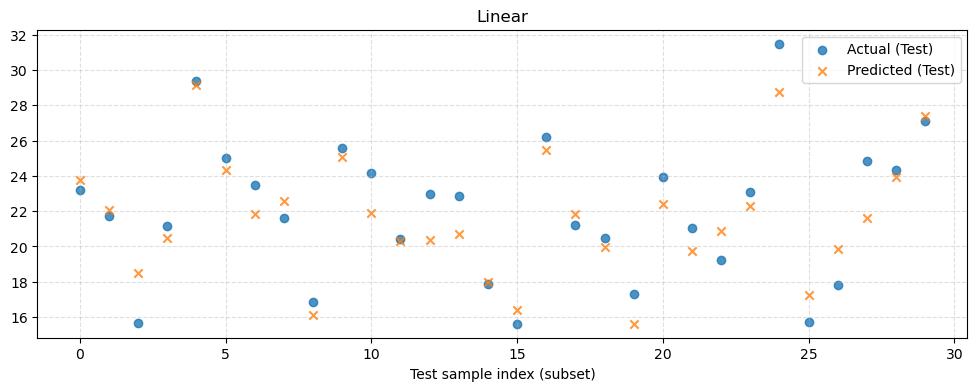

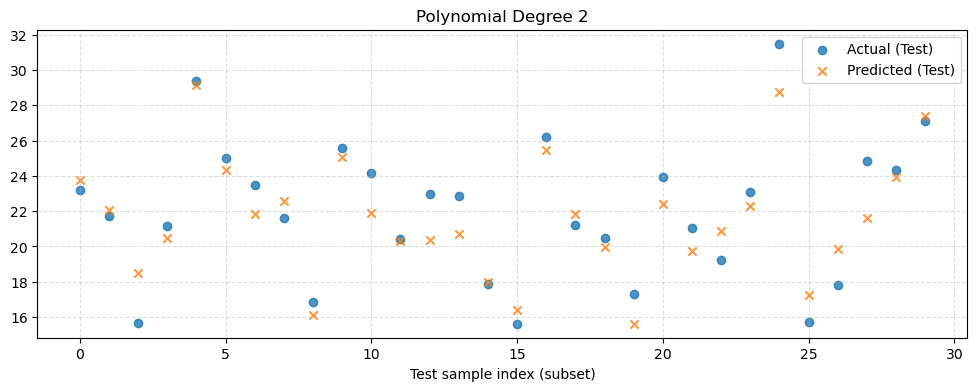

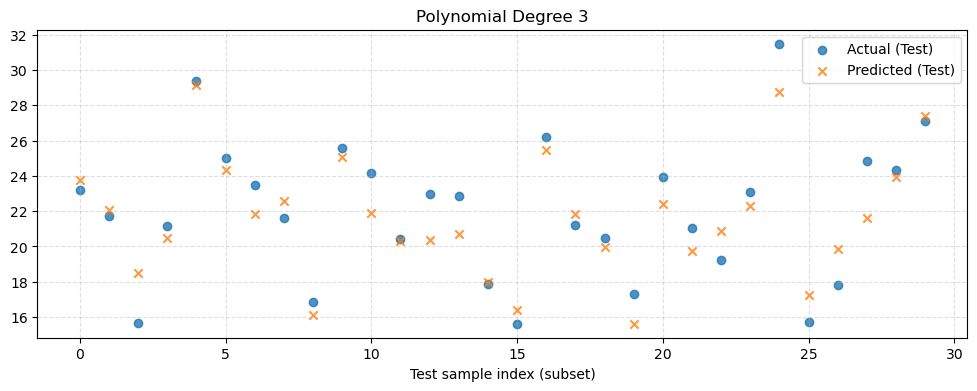

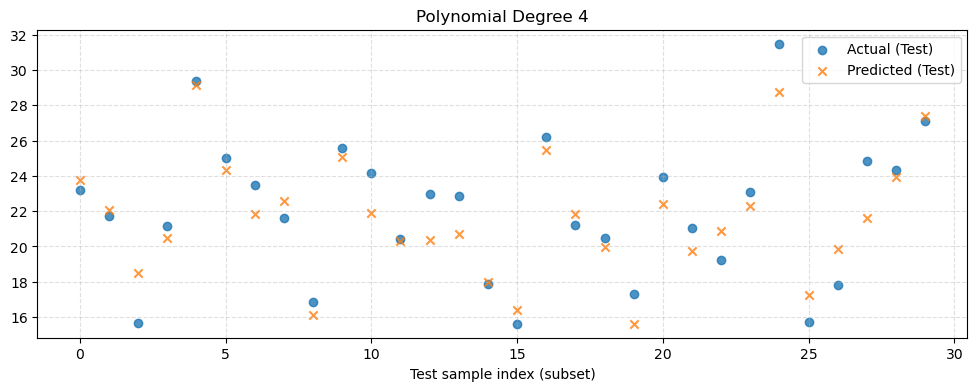

,Model,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
0,Linear Regression,1.939593,1.159458,0.918992,2.134632,1.180324,0.859886
1,Poly (deg=2),1.911782,1.152731,0.920154,2.166002,1.197144,0.857827
2,Poly (deg=3),1.904079,1.160475,0.920475,2.159431,1.193914,0.858258
3,Poly (deg=4),1.852244,1.149784,0.922640,2.226997,1.203483,0.853823


In [10]:
plot_actual_vs_predicted_test(y_test, yhat_test, "Linear")
plot_actual_vs_predicted_test(y_test, yhat_test, "Polynomial Degree 2")
plot_actual_vs_predicted_test(y_test, yhat_test, "Polynomial Degree 3")
plot_actual_vs_predicted_test(y_test, yhat_test, "Polynomial Degree 4")

results = [
    {
        "Model": "Linear Regression",
        "Train MSE": linear_stats_train["MSE"],
        "Train MAE": linear_stats_train["MAE"],
        "Train R2":  linear_stats_train["R^2"],
        "Test MSE":  linear_stats_test["MSE"],
        "Test MAE":  linear_stats_test["MAE"],
        "Test R2":   linear_stats_test["R^2"],
    },
    {
        "Model": "Poly (deg=2)",
        "Train MSE": degree_2_stats_train["MSE"],
        "Train MAE": degree_2_stats_train["MAE"],
        "Train R2":  degree_2_stats_train["R^2"],
        "Test MSE":  degree_2_stats_test["MSE"],
        "Test MAE":  degree_2_stats_test["MAE"],
        "Test R2":   degree_2_stats_test["R^2"],
    },
    {
        "Model": "Poly (deg=3)",
        "Train MSE": degree_3_stats_train["MSE"],
        "Train MAE": degree_3_stats_train["MAE"],
        "Train R2":  degree_3_stats_train["R^2"],
        "Test MSE":  degree_3_stats_test["MSE"],
        "Test MAE":  degree_3_stats_test["MAE"],
        "Test R2":   degree_3_stats_test["R^2"],
    },
    {
        "Model": "Poly (deg=4)",
        "Train MSE": degree_4_stats_train["MSE"],
        "Train MAE": degree_4_stats_train["MAE"],
        "Train R2":  degree_4_stats_train["R^2"],
        "Test MSE":  degree_4_stats_test["MSE"],
        "Test MAE":  degree_4_stats_test["MAE"],
        "Test R2":   degree_4_stats_test["R^2"],
    },
]

results_df = pd.DataFrame (results)
display(results_df)

Discussion of results:

The linear regression model performs the best on this data's test set. Reading the summary statistics it can be observed that the test R2 value is higher than all other models as well as MSE and MAE having the smallest value of the set. These 3 comparisons lead to a conclusion that the linear regression model is best for this current test set.

Increasing polynomial degree is not always proven to improve performance as is observed here. With the current test results it is observed that a linear regression model is better in this scenario. Polynomial regression can overcomplicate data when a simpler would approach in some situations as it would appear to be here.

The model is not performing unexpectdley poorly but might be showing small signs of over fitting. At higher degrees it might be fitting to some noise in the dataset especially with the dataset's slightly smaller sample size. Overall, all models are performing well with R2 values over .85 and low errors.

Data is imported and read

In [11]:
DATA_DIR = kagglehub.dataset_download("sudhirsingh27/electricity-consumption-based-on-weather-data")

print("Downloaded to:", DATA_DIR)
print("Files:", os.listdir(DATA_DIR))
csv_path = os.path.join(DATA_DIR, "electricity_consumption_based_weather_dataset.csv")
df = pd.read_csv(csv_path)


Downloaded to: /Users/tylerwatkins/.cache/kagglehub/datasets/sudhirsingh27/electricity-consumption-based-on-weather-data/versions/1
Files: ['electricity_consumption_based_weather_dataset.csv']


Initial summary statistics are shown and missing values are noted

In [12]:
print("Columns:", df.columns.tolist())

print("Summary Statistics")
display(df.describe(include="all"))

print("Shape:", df.shape)

print("Missing Values:")
display(df.isna().sum())

Columns: ['date', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'daily_consumption']
Summary Statistics


,date,AWND,PRCP,TMAX,TMIN,daily_consumption
count,1433,1418.000000,1433.000000,1433.000000,1433.000000,1433.000000
unique,1433,NaN,NaN,NaN,NaN,NaN
top,2006-12-16,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.642313,3.800488,17.187509,9.141242,1561.078061
std,NaN,1.140021,10.973436,10.136415,9.028417,606.819667
min,NaN,0.000000,0.000000,-8.900000,-14.400000,14.218000
25%,NaN,1.800000,0.000000,8.900000,2.200000,1165.700000
50%,NaN,2.400000,0.000000,17.800000,9.400000,1542.650000
75%,NaN,3.300000,1.300000,26.100000,17.200000,1893.608000


Shape: (1433, 6)
Missing Values:


date                  0
AWND                 15
PRCP                  0
TMAX                  0
TMIN                  0
daily_consumption     0
dtype: int64

Data is updated to exclude columns with null data

In [13]:
df = df.dropna()
print("Missing values after cleaning:")
display(df.isna().sum())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

Missing values after cleaning:


date                 0
AWND                 0
PRCP                 0
TMAX                 0
TMIN                 0
daily_consumption    0
dtype: int64

            date  AWND   PRCP  TMAX  TMIN  daily_consumption
0     2006-12-16   2.5    0.0  10.6   5.0           1209.176
1     2006-12-17   2.6    0.0  13.3   5.6           3390.460
2     2006-12-18   2.4    0.0  15.0   6.7           2203.826
3     2006-12-19   2.4    0.0   7.2   2.2           1666.194
4     2006-12-20   2.4    0.0   7.2   1.1           2225.748
5     2006-12-21   2.3    0.0  12.2   3.3           1716.624
6     2006-12-22   2.3   11.9   9.4   3.9           2341.338
7     2006-12-23   3.0   19.8  15.0   8.9           4773.386
8     2006-12-24   3.4    0.0  11.1   6.1           2550.012
9     2006-12-25   2.2    9.4   7.2   3.9           2743.120
10    2006-12-26   3.3    2.0  11.7   6.1           3934.110
11    2006-12-27   3.4    0.0   6.1   3.3           1528.760
12    2006-12-28   2.3    0.0   8.9   2.2           2072.638
13    2006-12-29   2.1    0.0   8.9   2.8           3174.392
14    2006-12-30   2.1    0.0   8.3   1.1           2789.302
15    2006-12-31   2.1  

Dependent data is seperated from 4 independent variables

In [14]:
x_weather_data = df[['AWND', 'PRCP', 'TMAX', 'TMIN']]
y_daily_consumption = df['daily_consumption']

x_train, x_test, y_train, y_test = split_data(x_weather_data, y_daily_consumption)


Linear regression model is fit to data

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)


yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

linear_stats_train = compute_metrics(y_train, yhat_train)
linear_stats_test = compute_metrics(y_test, yhat_test)

Polynomial regression model of degree 2 is fit to data

In [16]:
model = Pipeline([
                ("poly", PolynomialFeatures(degree=2, include_bias=False)),
                ("lr", LinearRegression())
            ])

model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

degree_2_stats_train = compute_metrics(y_train, yhat_train)
degree_2_stats_test = compute_metrics(y_test, yhat_test)


Polynomial regression model of degree 3 is fit to data

In [17]:
model = Pipeline([
                ("poly", PolynomialFeatures(degree=3, include_bias=False)),
                ("lr", LinearRegression())
            ])

model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

degree_3_stats_train = compute_metrics(y_train, yhat_train)
degree_3_stats_test = compute_metrics(y_test, yhat_test)


Polynomial regression model of degree 4 is fit to data

In [18]:
model = Pipeline([
                ("poly", PolynomialFeatures(degree=4, include_bias=False)),
                ("lr", LinearRegression())
            ])

model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test  = model.predict(x_test)

degree_4_stats_train = compute_metrics(y_train, yhat_train)
degree_4_stats_test = compute_metrics(y_test, yhat_test)


Plots and stats are displayed below

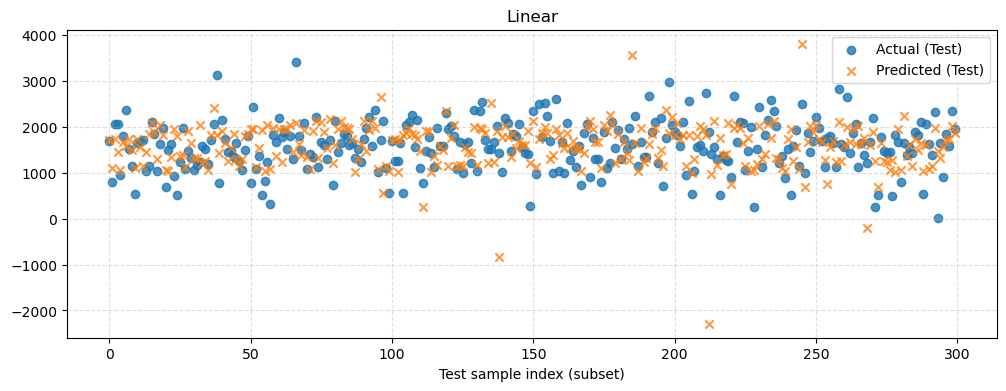

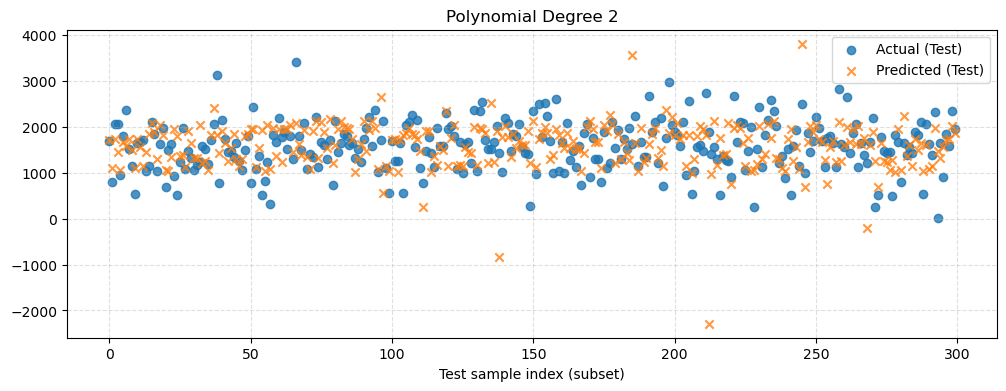

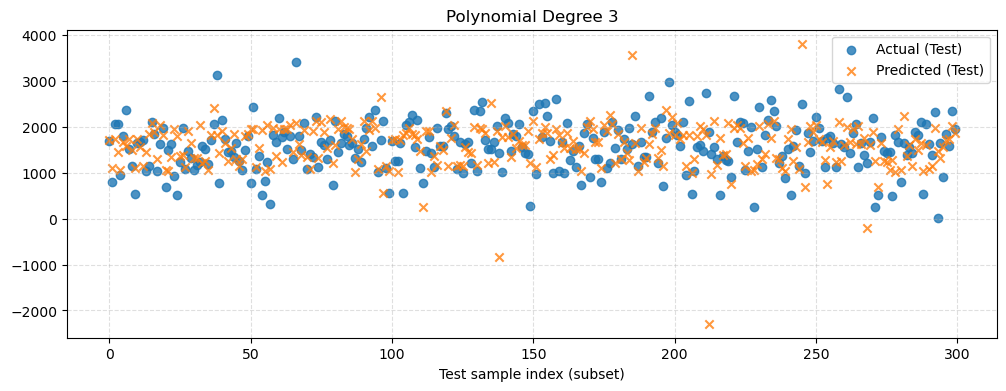

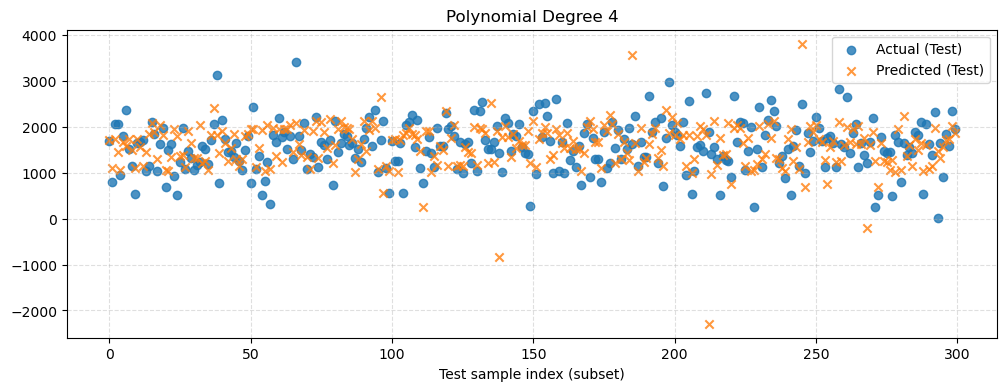

,Model,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
0,Linear Regression,270700.121645,382.953785,0.286003,2.556095e+05,383.293068,0.264225
1,Poly (deg=2),264199.645652,380.656398,0.303149,2.934005e+05,389.025288,0.155443
2,Poly (deg=3),255797.661699,375.936467,0.325310,1.926667e+07,612.311313,-54.459347
3,Poly (deg=4),247475.492596,370.069364,0.347260,1.087982e+07,629.246683,-30.317688


In [19]:
plot_actual_vs_predicted_test(y_test, yhat_test, "Linear")
plot_actual_vs_predicted_test(y_test, yhat_test, "Polynomial Degree 2")
plot_actual_vs_predicted_test(y_test, yhat_test, "Polynomial Degree 3")
plot_actual_vs_predicted_test(y_test, yhat_test, "Polynomial Degree 4")

results = [
    {
        "Model": "Linear Regression",
        "Train MSE": linear_stats_train["MSE"],
        "Train MAE": linear_stats_train["MAE"],
        "Train R2":  linear_stats_train["R^2"],
        "Test MSE":  linear_stats_test["MSE"],
        "Test MAE":  linear_stats_test["MAE"],
        "Test R2":   linear_stats_test["R^2"],
    },
    {
        "Model": "Poly (deg=2)",
        "Train MSE": degree_2_stats_train["MSE"],
        "Train MAE": degree_2_stats_train["MAE"],
        "Train R2":  degree_2_stats_train["R^2"],
        "Test MSE":  degree_2_stats_test["MSE"],
        "Test MAE":  degree_2_stats_test["MAE"],
        "Test R2":   degree_2_stats_test["R^2"],
    },
    {
        "Model": "Poly (deg=3)",
        "Train MSE": degree_3_stats_train["MSE"],
        "Train MAE": degree_3_stats_train["MAE"],
        "Train R2":  degree_3_stats_train["R^2"],
        "Test MSE":  degree_3_stats_test["MSE"],
        "Test MAE":  degree_3_stats_test["MAE"],
        "Test R2":   degree_3_stats_test["R^2"],
    },
    {
        "Model": "Poly (deg=4)",
        "Train MSE": degree_4_stats_train["MSE"],
        "Train MAE": degree_4_stats_train["MAE"],
        "Train R2":  degree_4_stats_train["R^2"],
        "Test MSE":  degree_4_stats_test["MSE"],
        "Test MAE":  degree_4_stats_test["MAE"],
        "Test R2":   degree_4_stats_test["R^2"],
    },
]

results_df = pd.DataFrame (results)
display(results_df)

Discussion of results:

The linear regression model performs the best on this data's test set. Reading the summary statistics it can be observed that the test R2 value is higher than all other models as well as MSE and MAE having the smallest value of the set. These 3 comparisons lead to a conclusion that the linear regression model is best for this current test set. This would suggest there is a linear relationship between weather factors could be found to predict electricity usage. However the R2 value and higher MSE and MAE values on the test data suggest that further research is needed.

Polynomial models and specifically the higher-degree modules tended to perform worse on this data set. The R2 values suggest some degree of overfitting might be occuring as well as the spiking values of MSE and MAE. The models may be too sensitive to noise from outlier data leading to poor performance.

None of the models acheive particulaly great performance and this can be for a number of reasons. One reason, the variables tempature min and tempature max can be correlated with each other and not truly independent. Another is that household output of electricity can depend on numerous more factors, number of occupants, season, region, and a location's HVAC capabilities. Not accounting for these factors and with only mild drivers of precipitation and wind speed there is likely not the correct the data to create a system relating weather and electricity. However with other factors present, a better model could likely be created.